<a href="https://colab.research.google.com/github/Karuna34/Life-Expectancy-Predition/blob/main/Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


**Load Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv


In [ ]:
#  upload file name
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
!ls

Life_Expectancy_Data.csv  sample_data


In [ ]:
df.isnull().sum()


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
df.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


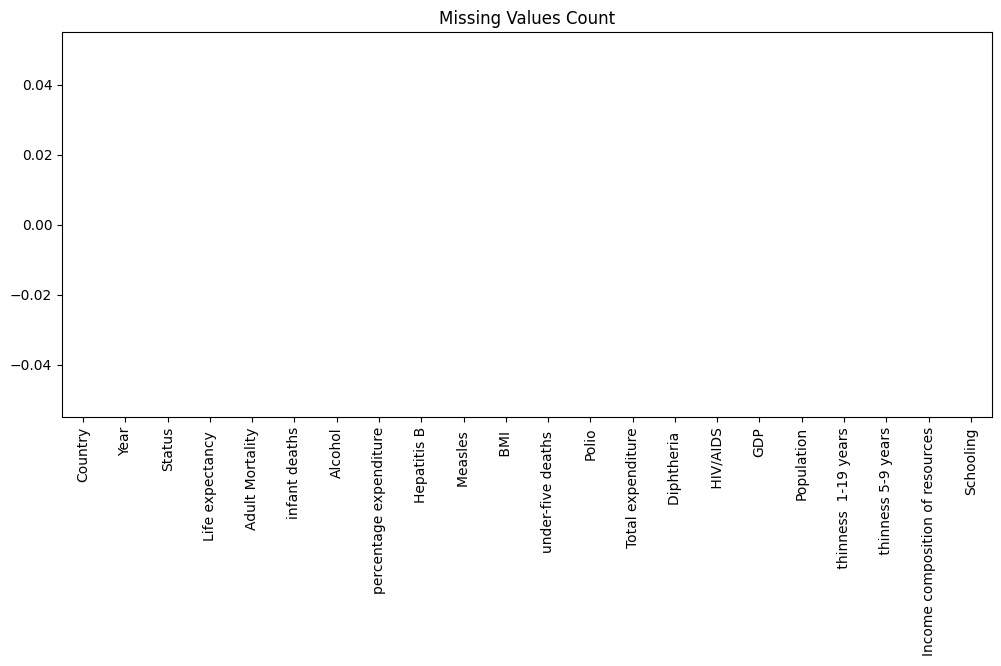

In [ ]:
df.isnull().sum().plot(kind='bar', figsize=(12,5))
plt.title("Missing Values Count")
plt.show()


In [ ]:
print(df.columns)


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


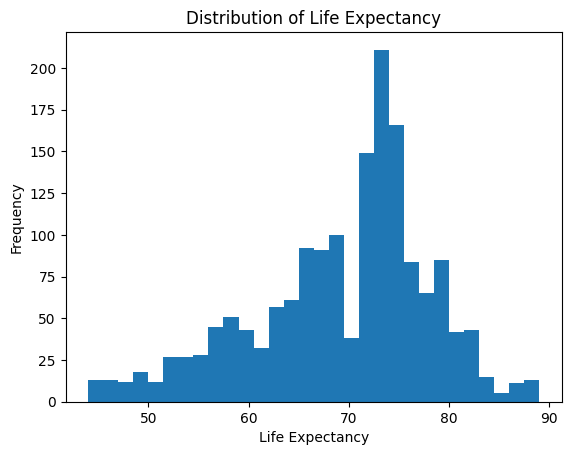

In [ ]:
plt.hist(df['Life expectancy'], bins=30)
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy")
plt.show()


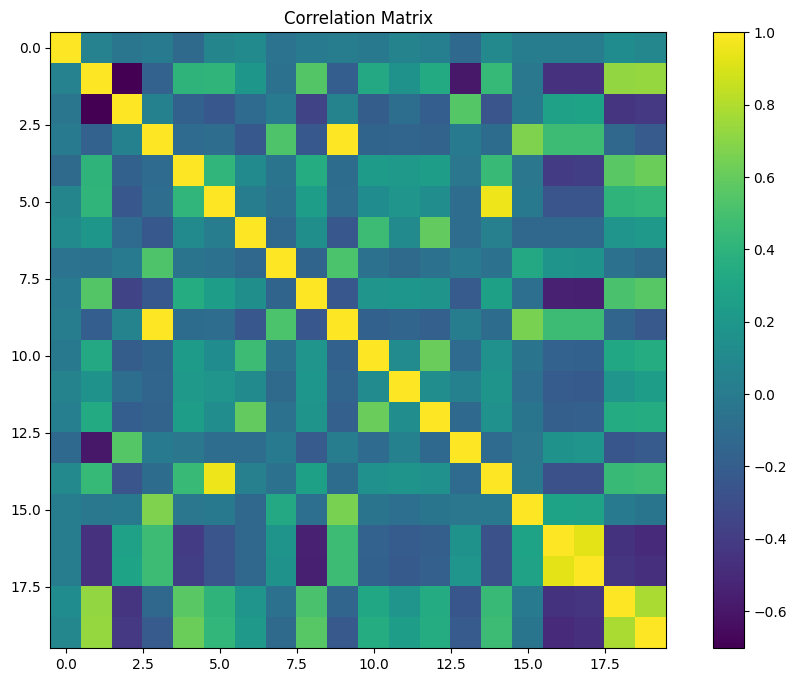

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
plt.imshow(corr)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [ ]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])


In [ ]:
X = df.drop(columns=['Life expectancy', 'Country'])
y = df['Life expectancy']
X = df.drop(columns=['Life expectancy', 'Country'])
y = df['Life expectancy']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Linear Regression Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))


Linear Regression
MAE: 2.750004043511416
RMSE: 3.6076230552522284
R2: 0.8167489605036691


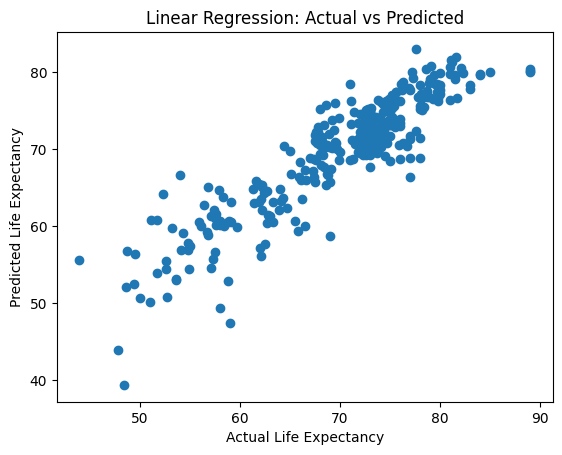

In [ ]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


**Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 1.1277424242424252
RMSE: 1.891879352213909
R2: 0.9496045863576907


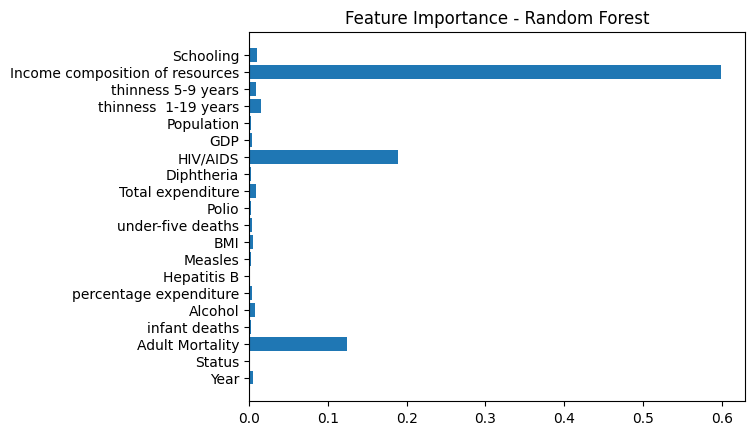

In [ ]:
importance = rf.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.title("Feature Importance - Random Forest")
plt.show()


**XGBoost Regressor**

In [ ]:
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [ ]:
print("XGBoost")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2:", r2_score(y_test, y_pred_xgb))


XGBoost
MAE: 1.2112616752855703
RMSE: 2.00107662444265
R2: 0.9436191554527759


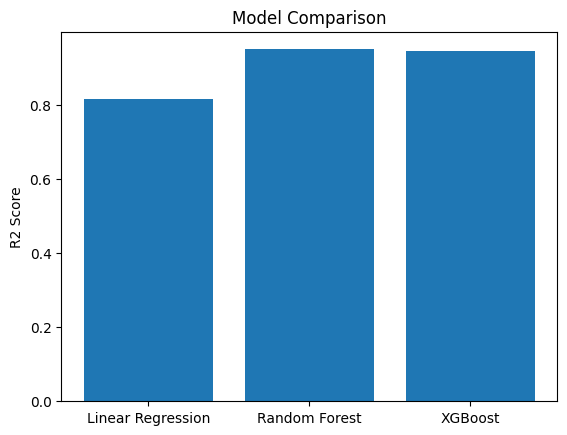

In [ ]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_xgb)
]

plt.bar(models, r2_scores)
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.show()


In [ ]:
sample = X_test.iloc[0:1]
predicted_value = xgb.predict(sample)
print("Predicted Life Expectancy:", predicted_value)


Predicted Life Expectancy: [69.6235]


In [ ]:
# select Nepal data
nepal_data = df[df['Country'] == 'Nepal']

# drop target and country
X_nepal = nepal_data.drop(columns=['Life expectancy', 'Country'])

# predict using best model (XGBoost)
nepal_pred = xgb.predict(X_nepal)

print("Predicted Life Expectancy for Nepal (sample):", nepal_pred[:5])


Predicted Life Expectancy for Nepal (sample): [69.59674  69.208626 68.65045  67.608246 67.11329 ]


In [ ]:
# Group by country and take average life expectancy
country_life = df.groupby("Country")["Life expectancy"].mean().reset_index()

# Country with highest life expectancy
best_country = country_life.loc[country_life["Life expectancy"].idxmax()]

# Country with lowest life expectancy
worst_country = country_life.loc[country_life["Life expectancy"].idxmin()]

print("Country with HIGHEST life expectancy:")
print(best_country)

print("\nCountry with LOWEST life expectancy:")
print(worst_country)

Country with HIGHEST life expectancy:
Country            Ireland
Life expectancy      83.44
Name: 58, dtype: object

Country with LOWEST life expectancy:
Country            Sierra Leone
Life expectancy          48.425
Name: 108, dtype: object


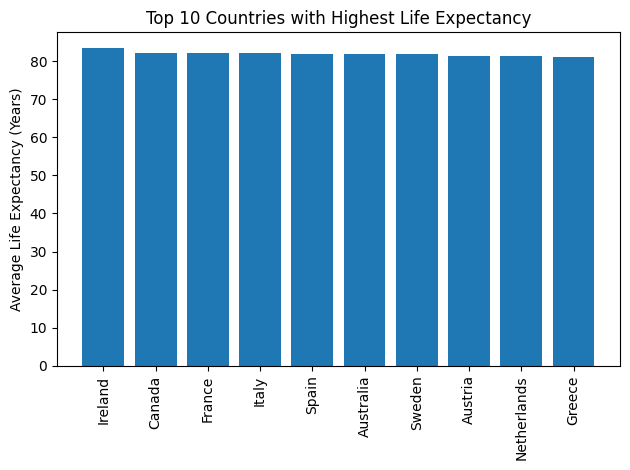

In [ ]:
# Average life expectancy per country
country_life = df.groupby("Country")["Life expectancy"].mean().reset_index()

# Top 10 countries
top10 = country_life.sort_values(by="Life expectancy", ascending=False).head(10)

# Plot Top 10
plt.figure()
plt.bar(top10["Country"], top10["Life expectancy"])
plt.xticks(rotation=90)
plt.ylabel("Average Life Expectancy (Years)")
plt.title("Top 10 Countries with Highest Life Expectancy")
plt.tight_layout()
plt.show()


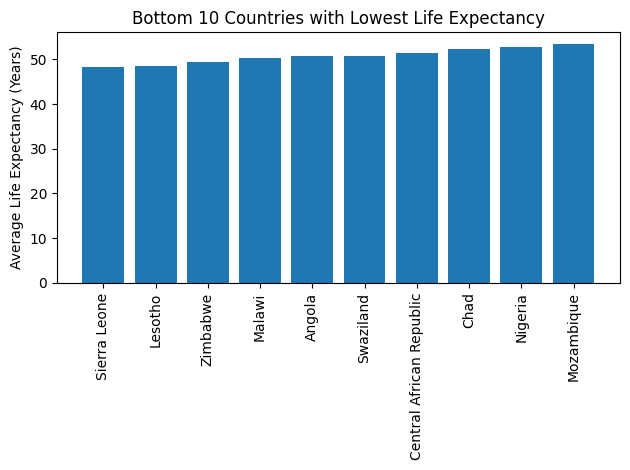

In [ ]:
# Bottom 10 countries
bottom10 = country_life.sort_values(by="Life expectancy").head(10)

# Plot Bottom 10
plt.figure()
plt.bar(bottom10["Country"], bottom10["Life expectancy"])
plt.xticks(rotation=90)
plt.ylabel("Average Life Expectancy (Years)")
plt.title("Bottom 10 Countries with Lowest Life Expectancy")
plt.tight_layout()
plt.show()


In [ ]:



# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# Create comparison table
results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2 Score"]
)

print(results_df)

               Model       MAE      RMSE  R2 Score
0  Linear Regression  2.750004  3.607623  0.816749
1      Random Forest  1.129812  1.891678  0.949615
2            XGBoost  1.172423  2.006957  0.943287
